In [1]:
# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('C:\\Users\\parag.datir\\Desktop\\Python-Practi\\test_JanJun1.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


C:\Users\parag.datir\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [3]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(250, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=40, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/40
 - 3s - loss: 0.0473
Epoch 2/40
 - 1s - loss: 0.0411
Epoch 3/40
 - 1s - loss: 0.0381
Epoch 4/40
 - 1s - loss: 0.0350
Epoch 5/40
 - 1s - loss: 0.0347
Epoch 6/40
 - 1s - loss: 0.0345
Epoch 7/40
 - 1s - loss: 0.0370
Epoch 8/40
 - 1s - loss: 0.0364
Epoch 9/40
 - 1s - loss: 0.0351
Epoch 10/40
 - 1s - loss: 0.0323
Epoch 11/40
 - 1s - loss: 0.0327
Epoch 12/40
 - 1s - loss: 0.0333
Epoch 13/40
 - 1s - loss: 0.0323
Epoch 14/40
 - 1s - loss: 0.0316
Epoch 15/40
 - 1s - loss: 0.0333
Epoch 16/40
 - 1s - loss: 0.0324
Epoch 17/40
 - 1s - loss: 0.0317
Epoch 18/40
 - 1s - loss: 0.0319
Epoch 19/40
 - 1s - loss: 0.0300
Epoch 20/40
 - 1s - loss: 0.0315
Epoch 21/40
 - 1s - loss: 0.0314
Epoch 22/40
 - 1s - loss: 0.0317
Epoch 23/40
 - 1s - loss: 0.0309
Epoch 24/40
 - 1s - loss: 0.0298
Epoch 25/40
 - 1s - loss: 0.0296
Epoch 26/40
 - 1s - loss: 0.0295
Epoch 27/40
 - 1s - loss: 0.0294
Epoch 28/40
 - 1s - loss: 0.0317
Epoch 29/40
 - 1s - loss: 0.0328
Epoch 30/40
 - 1s - loss: 0.0307
Epoch 31/40
 - 1s -

In [4]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 495.78 RMSE
Test Score: 609.19 RMSE


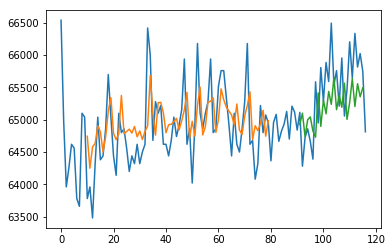

In [5]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [14]:
Actual_Test = numpy.array(testY).round()
Actual_Test

array([[65114., 64281., 64724., 64859., 64664., 64390., 65587., 64950.,
        65807., 65282., 65887., 65592., 66495., 65536., 65760., 65211.,
        65956., 65057., 65471., 66206., 65648., 66336., 65816., 66024.,
        65750.]])

In [32]:
df = pd.DataFrame(Actual_Test)
df = df.T
df.columns = ['Actual_Test']
df

,Actual_Test
0,65114.0
1,64281.0
2,64724.0
3,64859.0
4,64664.0
5,64390.0
6,65587.0
7,64950.0
8,65807.0
9,65282.0


In [8]:
Predict_Test = numpy.array(testPredict).round()


In [33]:
df1 = pd.DataFrame(Predict_Test)
df1.columns = ['Predict_Test']
df1

,Predict_Test
0,64927.0
1,65101.0
2,64739.0
3,65000.0
4,65043.0
5,64825.0
6,64729.0
7,65415.0
8,64898.0
9,65303.0


In [39]:
test_predict= pd.concat([df, df1], axis=1)
test_predict

,Actual_Test,Predict_Test
0,65114.0,64927.0
1,64281.0,65101.0
2,64724.0,64739.0
3,64859.0,65000.0
4,64664.0,65043.0
5,64390.0,64825.0
6,65587.0,64729.0
7,64950.0,65415.0
8,65807.0,64898.0
9,65282.0,65303.0


In [41]:
test_predict.to_excel('C:\\Users\\parag.datir\\Desktop\\Python-Practi\\test.xlsx', sheet_name='sheet1', index=False)